# **Metodología crisp-dm para predecir las atenciones médicas en el hospital de apoyo maría auxiliadora**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%pip install category_encoders

# **Comprensión del negocio**

## 1.1 Objetivos del negocio

El objetivo principal del proyecto es optimizar la gestión hospitalaria mediante un modelo predictivo que anticipe la asistencia o inasistencia de los pacientes a sus consultas médicas. Esto permitirá mejorar la asignación de recursos (médicos, personal y equipamiento), reducir la congestión en las instalaciones y aumentar la calidad de la atención. Además, se busca disminuir las inasistencias, optimizando el uso del tiempo y reduciendo la saturación de los servicios de salud.

---

## 1.2 Evaluación de la situación

El Hospital María Auxiliadora dispone de registros históricos de pacientes, diagnósticos y citas médicas. No obstante, existen desafíos en la calidad y preparación de los datos para análisis predictivo. Aunque se cuenta con sistemas de gestión, no se utiliza un enfoque predictivo para anticipar inasistencias. Por ello, se requiere aplicar técnicas de minería de datos para descubrir patrones de comportamiento y mejorar la planificación de recursos médicos.

---

## 1.3 Objetivos de la minería de datos

El objetivo específico es construir un modelo de clasificación que prediga la probabilidad de que un paciente asista o no a su cita médica. Esto permitirá identificar patrones asociados a inasistencias y factores de riesgo, facilitando una programación más eficiente, disminuyendo las pérdidas por ausencias y mejorando la atención médica y uso de los servicios.

# **Conociendo nuestros datos**

In [ ]:
# Librerías base
import pandas as pd
import numpy as np
import warnings

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y escalado
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Codificación
import category_encoders as ce

# Desbalanceo
from imblearn.combine import SMOTETomek

# Opcional
warnings.filterwarnings("ignore")


## 1) Recolección de los datos iniciales

El dataset utilizado en este proyecto fue obtenido de la plataforma de datos abiertos del gobierno del Perú. Contiene registros de citas médicas del Hospital de Apoyo María Auxiliadora durante el año 2023. Los datos fueron recopilados por el área de informática del hospital y están disponibles públicamente, lo que garantiza transparencia y legalidad en su uso. Este conjunto de datos incluye información relevante tanto del paciente como del servicio médico brindado, permitiendo un análisis predictivo confiable y enfocado en la asistencia a las citas médicas.

---



## 2) Descripción de los datos

El conjunto de datos contiene variables clave relacionadas con la atención médica, incluyendo características del paciente, detalles de la cita y ubicación del hospital. La variable objetivo del análisis es `ATENDIDO`, que indica si el paciente asistió (`VINO`) o no (`NO VINO`) a su cita.

A continuación, se resumen algunas variables principales:

| Variable            | Descripción                                             | Tipo de dato     |
|---------------------|---------------------------------------------------------|------------------|
| FECHA_CORTE         | Fecha del corte del dataset                             | Numérico         |
| ID                  | Identificador único del paciente (anonimizado)          | Alfanumérico     |
| DIA_CITA            | Fecha programada de la cita médica                      | Numérico         |
| ESPECIALIDAD        | Consultorio o especialidad de atención                  | Texto            |
| SEXO                | Sexo del paciente                                       | Texto            |
| EDAD                | Edad del paciente                                       | Numérico         |
| SEGURO              | Indica si el paciente cuenta con seguro de salud        | Texto            |
| PRESENCIAL_REMOTO   | Tipo de atención (presencial o remota)                  | Texto            |
| ATENDIDO            | Asistencia del paciente a su cita médica                | Texto            |
| MONTO               | Pago realizado por la cita médica (en soles)            | Numérico         |
| DEPARTAMENTO        | Departamento del hospital                               | Texto            |
| UBIGEO              | Código geográfico de ubicación                          | Alfanumérico     |

Estas variables permiten construir un modelo predictivo robusto para anticipar la asistencia médica de los pacientes.

In [ ]:
# Leer datos
data = pd.read_csv("/content/drive/MyDrive/BIGDATA_5TO/MINERIA_DE_DATOS/PROYECTO/DATOS HOSPITAL MARIA AUXILIADORA.csv",sep=";")
data.tail()

,FECHA_CORTE,ID,DIA_SOLICITACITA,DIA_CITA,ESPECIALIDAD,SEXO,EDAD,SEGURO,PRESENCIAL_REMOTO,ATENDIDO,MONTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO
450624,20240430,150,20231201,20231230,PSICOLOGIA,FEMENINO,64.0,SI,PRESENCIAL,NO,30,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133
450625,20240430,950469,20231205,20231230,PSICOLOGIA,FEMENINO,14.0,SI,PRESENCIAL,NO,30,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133
450626,20240430,1373246,20231205,20231230,PSICOLOGIA,FEMENINO,8.0,SI,PRESENCIAL,NO,30,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133
450627,20240430,2118536,20231205,20231230,PSICOLOGIA,MASCULINO,6.0,SI,PRESENCIAL,NO,30,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133
450628,20240430,2346541,20231207,20231230,PSICOLOGIA,MASCULINO,11.0,NO,PRESENCIAL,NO,30,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133


## 3) Verificación de la calidad de los datos

### Informacion de las variables

In [ ]:
# Informacion de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450629 entries, 0 to 450628
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FECHA_CORTE        450629 non-null  int64  
 1   ID                 450629 non-null  int64  
 2   DIA_SOLICITACITA   450629 non-null  int64  
 3   DIA_CITA           450629 non-null  int64  
 4   ESPECIALIDAD       450629 non-null  object 
 5   SEXO               450629 non-null  object 
 6   EDAD               450628 non-null  float64
 7   SEGURO             450626 non-null  object 
 8   PRESENCIAL_REMOTO  450629 non-null  object 
 9   ATENDIDO           450629 non-null  object 
 10  MONTO              450629 non-null  int64  
 11  DEPARTAMENTO       450629 non-null  object 
 12  PROVINCIA          450629 non-null  object 
 13  DISTRITO           450629 non-null  object 
 14  UBIGEO             450629 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 51

In [ ]:
print(data["SEXO"].unique())
print(data["SEGURO"].unique())
print(data["PRESENCIAL_REMOTO"].unique())
print(data['MONTO'].unique())
print(data["ATENDIDO"].unique())

['FEMENINO' 'MASCULINO']
['SI' 'NO' nan]
['REMOTO' 'PRESENCIAL']
[33  7 30 26]
['SI' 'NO']


###  Cantidad he informacion de datos faltantes

In [ ]:
# Datos faltantes
data.isnull().sum()

,0
FECHA_CORTE,0
ID,0
DIA_SOLICITACITA,0
DIA_CITA,0
ESPECIALIDAD,0
SEXO,0
EDAD,1
SEGURO,3
PRESENCIAL_REMOTO,0
ATENDIDO,0


In [ ]:
v_numericas = data[['EDAD','MONTO']]
v_numericas.describe()

,EDAD,MONTO
count,450628.000000,450629.000000
mean,46.511156,12.544554
std,23.548926,10.127518
min,-5.000000,7.000000
25%,29.000000,7.000000
50%,50.000000,7.000000
75%,65.000000,7.000000
max,107.000000,33.000000


In [ ]:
# valores negativos de la columa EDAD
edad_negative = data[data['EDAD'] < 0]
edad_negative


,FECHA_CORTE,ID,DIA_SOLICITACITA,DIA_CITA,ESPECIALIDAD,SEXO,EDAD,SEGURO,PRESENCIAL_REMOTO,ATENDIDO,MONTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO
326112,20240430,859465,20230909,20230923,ODONTOLOGIA,FEMENINO,-5.0,NO,PRESENCIAL,NO,26,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133


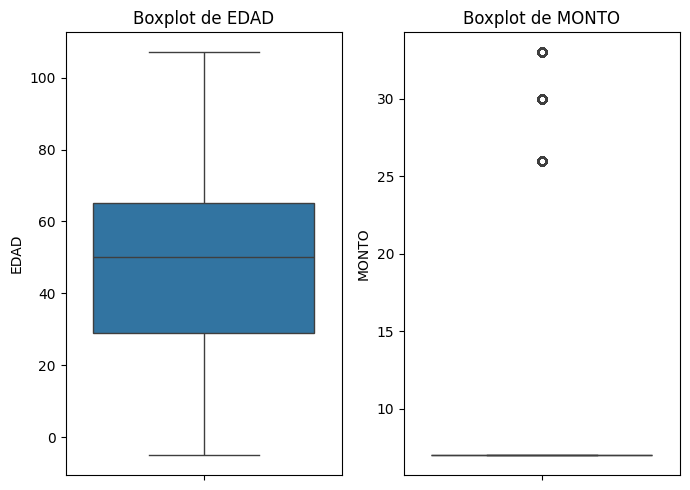

In [ ]:
v_numericas = list(v_numericas.columns)
v_numericas

# Criando subplots para cada columna
plt.figure(figsize=(7, 5))
for i, columna in enumerate(v_numericas):
    plt.subplot(1, len(v_numericas), i+1)
    sns.boxplot(data=data, y=columna)
    plt.title(f"Boxplot de {columna}")
plt.tight_layout()
plt.show()

## 4) Exploración de los datos

###  Descripcion y graficos de variables cualitativos y cuantitativos

In [ ]:
data.columns

Index(['FECHA_CORTE', 'ID', 'DIA_SOLICITACITA', 'DIA_CITA', 'ESPECIALIDAD',
       'SEXO', 'EDAD', 'SEGURO', 'PRESENCIAL_REMOTO', 'ATENDIDO', 'MONTO',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO'],
      dtype='object')

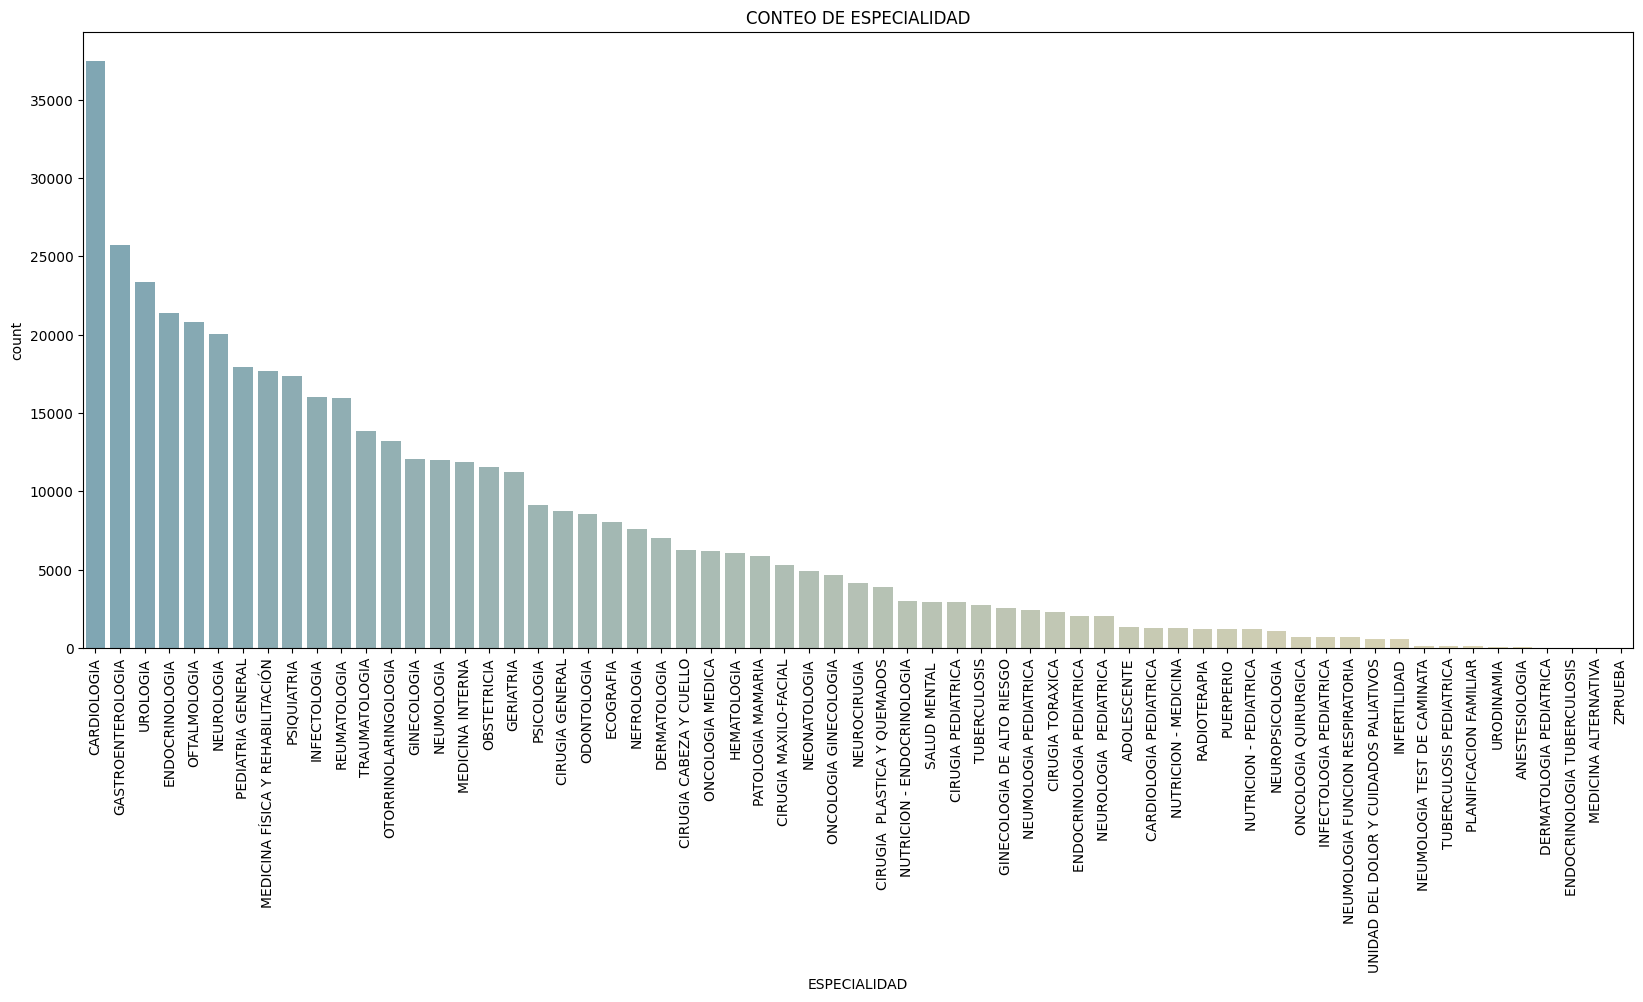

In [ ]:
order = data['ESPECIALIDAD'].value_counts().index
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x="ESPECIALIDAD", order = order, palette= 'blend:#7AB,#EDA')
#annotate_bars_percentage(ax)
plt.title("CONTEO DE ESPECIALIDAD")
plt.xticks(rotation=90)
plt.show()

In [ ]:
data['ESPECIALIDAD'].value_counts(ascending=True).head(20)

,count
ESPECIALIDAD,
ZPRUEBA,2
MEDICINA ALTERNATIVA,2
ENDOCRINOLOGIA TUBERCULOSIS,5
DERMATOLOGIA PEDIATRICA,14
ANESTESIOLOGIA,51
URODINAMIA,51
PLANIFICACION FAMILIAR,112
TUBERCULOSIS PEDIATRICA,125
NEUMOLOGIA TEST DE CAMINATA,127


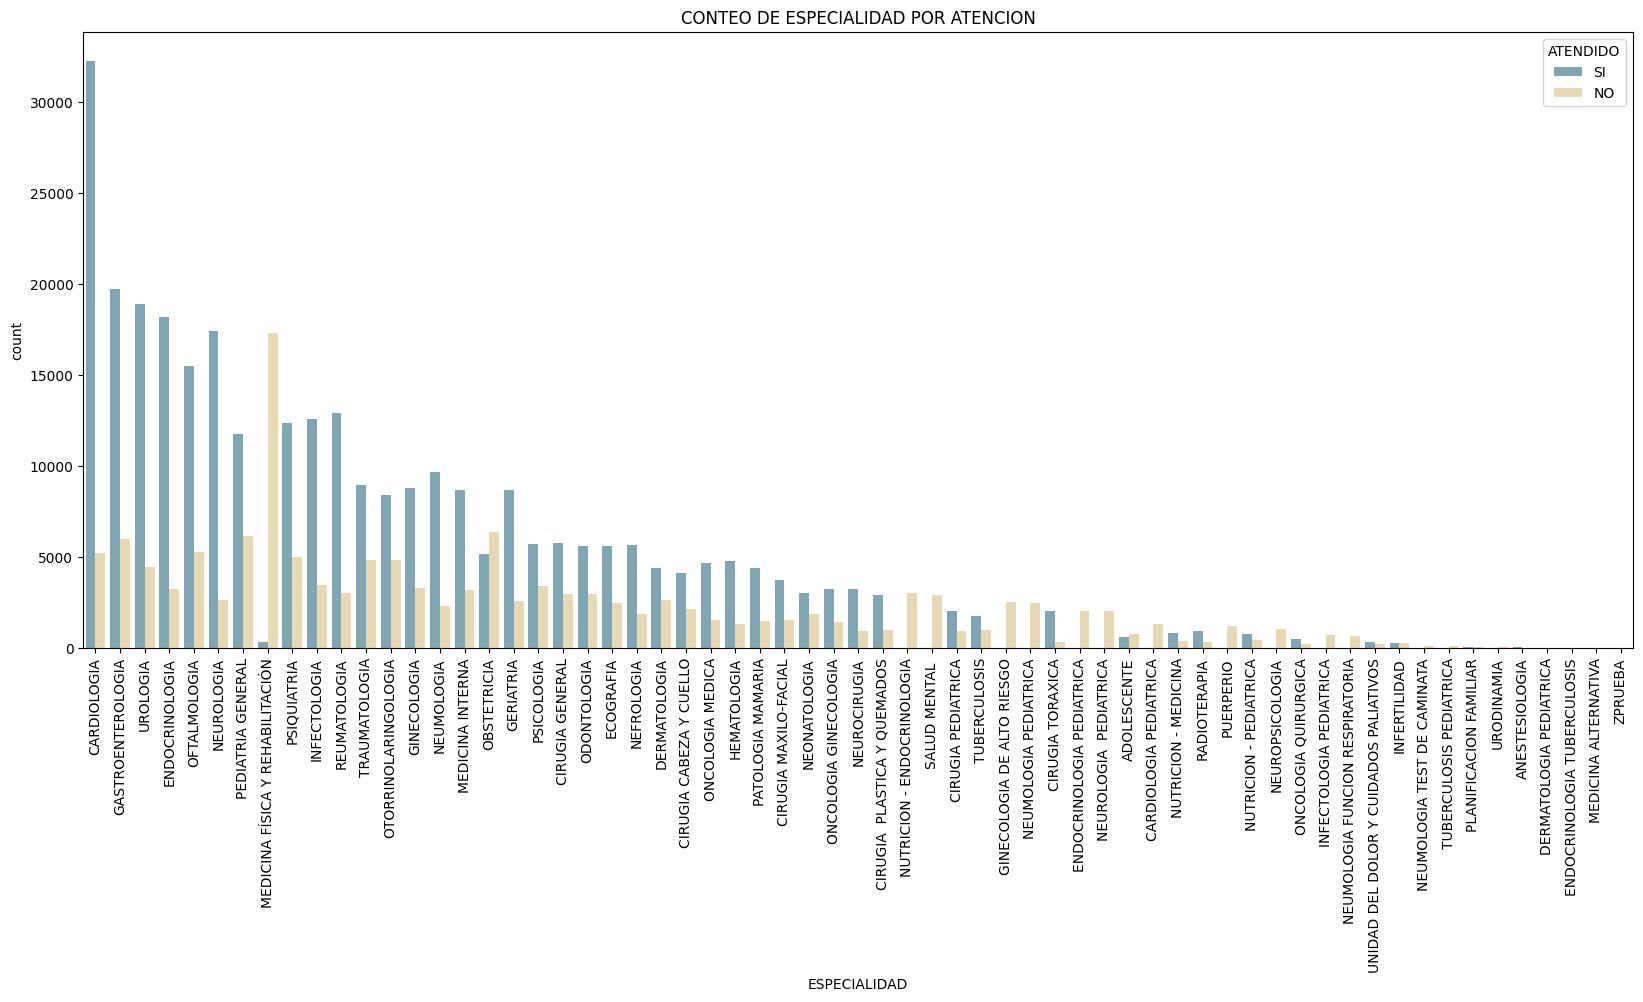

In [ ]:
order = data['ESPECIALIDAD'].value_counts().index
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x="ESPECIALIDAD", hue = 'ATENDIDO', order = order, palette= 'blend:#7AB,#EDA')
#annotate_bars_percentage(ax)
plt.title("CONTEO DE ESPECIALIDAD POR ATENCION")
plt.xticks(rotation=90)
plt.show()

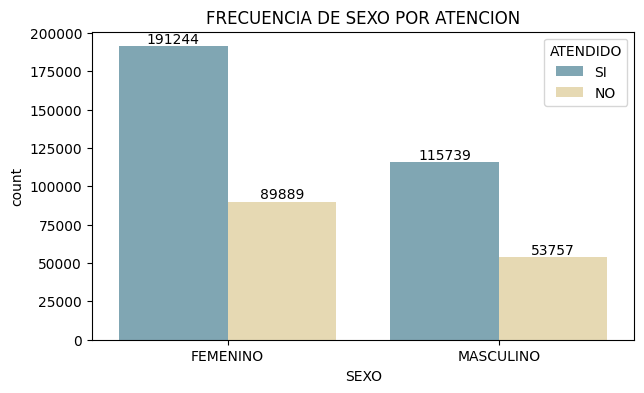

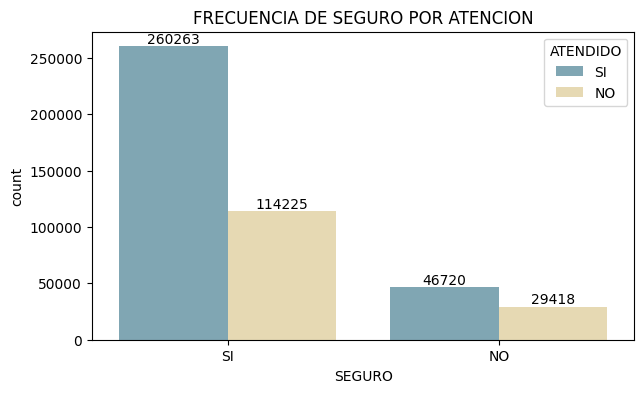

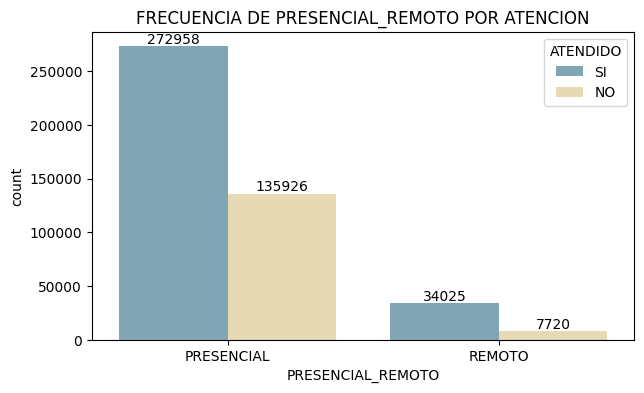

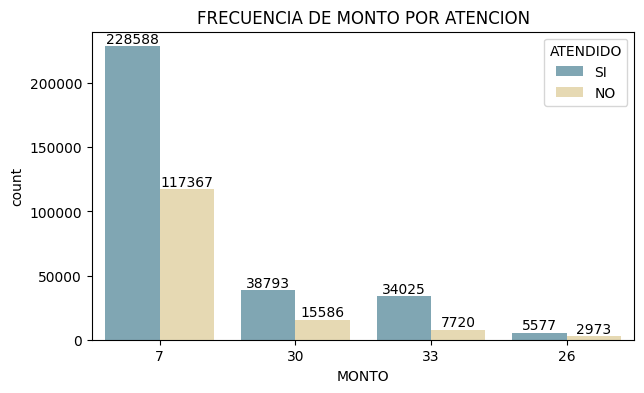

In [ ]:
# Lista de columnas a graficar
columns_to_plot = ['SEXO', 'SEGURO', 'PRESENCIAL_REMOTO','MONTO']

# Crear gráficos para cada columna
for column in columns_to_plot:
    order = data[column].value_counts().index
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=data, x=column, order=order,hue ="ATENDIDO" ,palette="blend:#7AB,#EDA")
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontweight='normal', fontsize=10)
    #annotate_bars_percentage(ax
    plt.title(f"FRECUENCIA DE {column} POR ATENCION")
    #plt.xticks(rotation=90)
    plt.show()

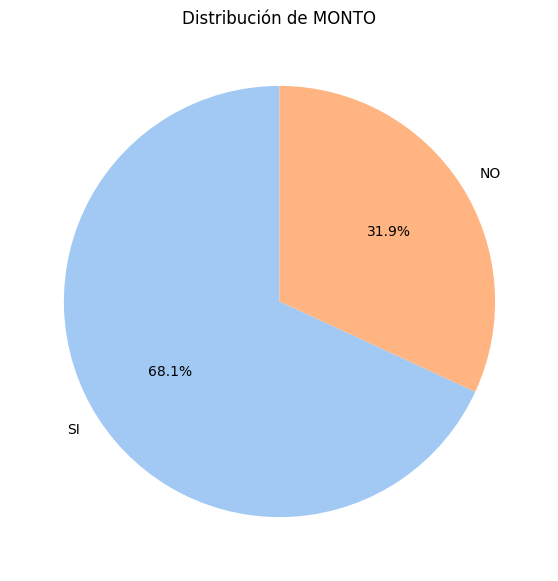

In [ ]:
# Gráfico de pastel del target
plt.figure(figsize=(7, 7))
data['ATENDIDO'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title(f"Distribución de {column}")
plt.ylabel('')
plt.show()

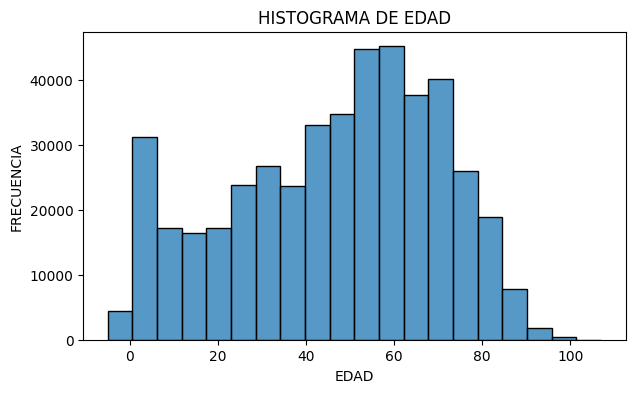

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(data, x="EDAD", bins=20)
plt.title("HISTOGRAMA DE EDAD")
plt.xlabel("EDAD")
plt.ylabel("FRECUENCIA")
plt.show()


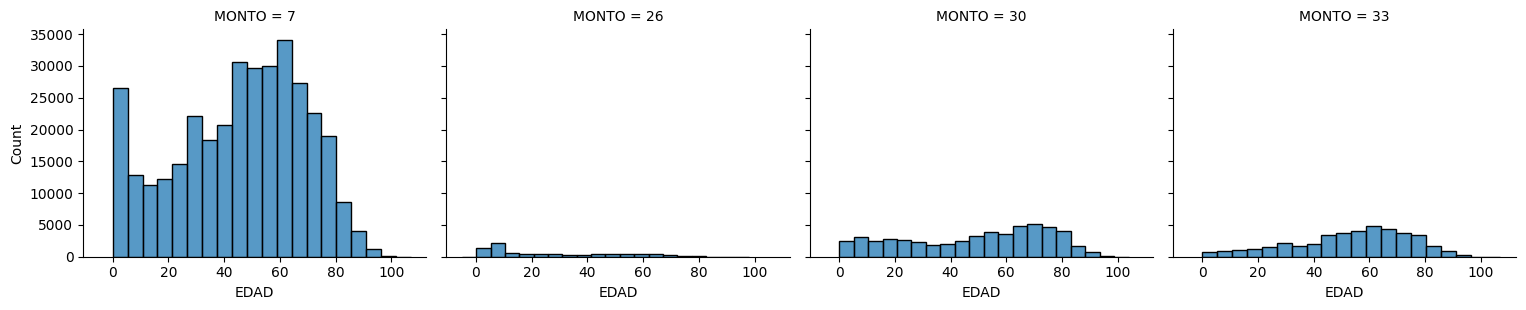

In [ ]:
columns_to_plot = ['ATENDIDO']
#['ATENDIDO','SEXO', 'SEGURO', 'PRESENCIAL_REMOTO', 'MONTO']
g = sns.FacetGrid(data, col=column,height=3.2, aspect=1.2)
g.map(sns.histplot, "EDAD",bins=20)


<Figure size 900x500 with 0 Axes>

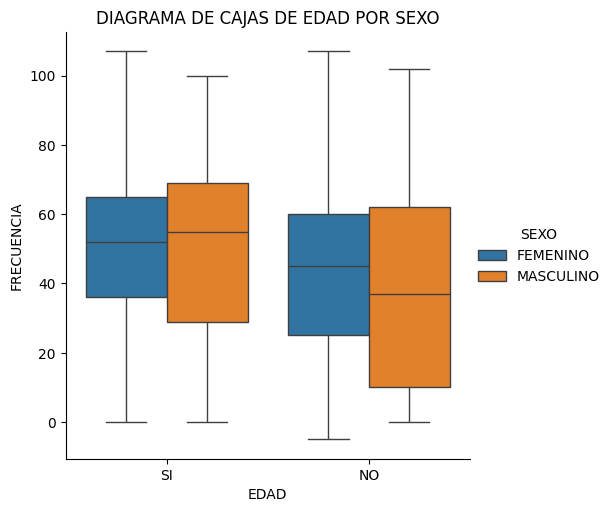

<Figure size 900x500 with 0 Axes>

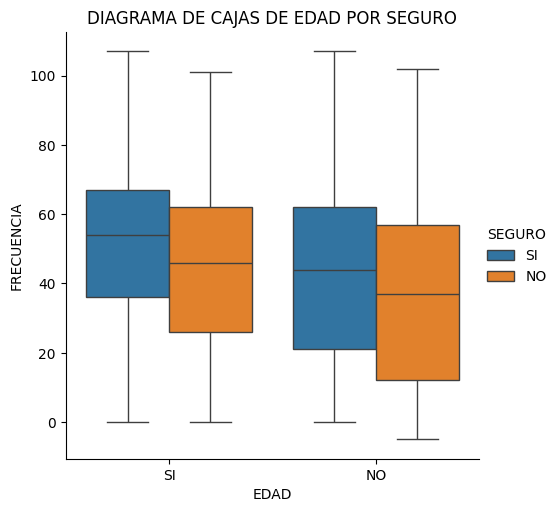

<Figure size 900x500 with 0 Axes>

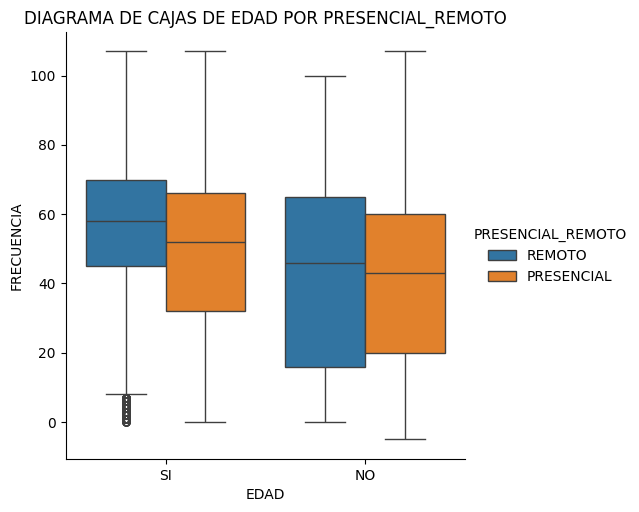

<Figure size 900x500 with 0 Axes>

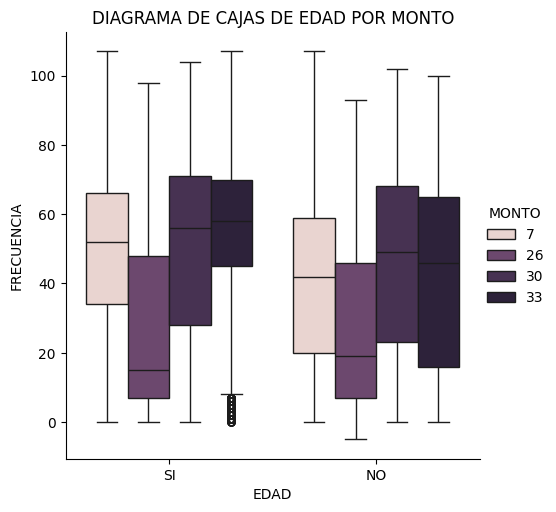

In [ ]:

# Lista de columnas a graficar
columns_to_plot = ['SEXO', 'SEGURO', 'PRESENCIAL_REMOTO', 'MONTO']

# Crear gráficos para cada columna
for column in columns_to_plot:
    plt.figure(figsize=(9, 5))
    sns.catplot(data=data, x="ATENDIDO", y="EDAD",hue=column, kind="box")
    plt.title(f"DIAGRAMA DE CAJAS DE EDAD POR {column}")
    plt.xlabel("EDAD")
    plt.ylabel("FRECUENCIA")
    plt.show()

### correlacion de variables

<Axes: >

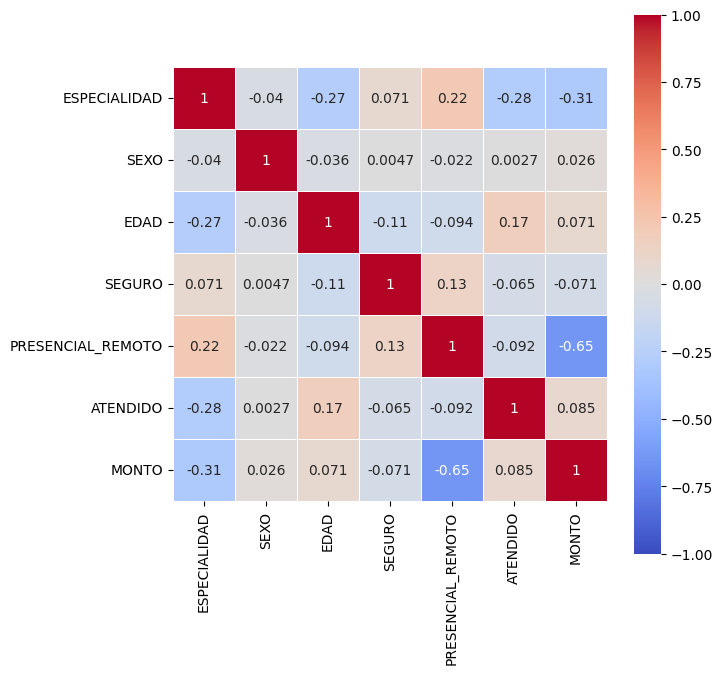

In [ ]:
# Seleccionar columnas numéricas y de tipo objeto del conjunto de datos
v_numericas4 = data.select_dtypes(include=['float64', 'int64', 'object'])
v_numericas4['ATENDIDO'] = v_numericas4['ATENDIDO'].map({'SI': 1, 'NO': 0})
# Factorizar columnas de tipo objeto para convertirlas a valores numéricos
for col in v_numericas4.select_dtypes(include=['object']).columns:
    v_numericas4[col] = pd.factorize(v_numericas4[col])[0]
v_numericas4 = v_numericas4.drop(['FECHA_CORTE','ID','DIA_SOLICITACITA','DIA_CITA','DEPARTAMENTO','PROVINCIA','DISTRITO','UBIGEO'],axis=1)
correlaciones1 = v_numericas4.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(correlaciones1,cmap="coolwarm",vmin=-1,vmax=1,
            linewidths=.5,square=True,annot=True)

# **Preparacion de los datos**

## 1) Selección de los datos





In [ ]:
data.columns

Index(['FECHA_CORTE', 'ID', 'DIA_SOLICITACITA', 'DIA_CITA', 'ESPECIALIDAD',
       'SEXO', 'EDAD', 'SEGURO', 'PRESENCIAL_REMOTO', 'ATENDIDO', 'MONTO',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO'],
      dtype='object')

In [ ]:
data1 = data.iloc[:, 2:11]
data1 = data1.drop(['SEXO'],axis=1)
data1.head()

,DIA_SOLICITACITA,DIA_CITA,ESPECIALIDAD,EDAD,SEGURO,PRESENCIAL_REMOTO,ATENDIDO,MONTO
0,20221220,20230102,GERIATRIA,77.0,SI,REMOTO,SI,33
1,20221223,20230102,GASTROENTEROLOGIA,37.0,SI,PRESENCIAL,SI,7
2,20221212,20230102,ENDOCRINOLOGIA,70.0,NO,PRESENCIAL,SI,7
3,20221202,20230102,PSIQUIATRIA,52.0,SI,PRESENCIAL,SI,30
4,20221219,20230102,CARDIOLOGIA,56.0,SI,PRESENCIAL,SI,7


## 2) Limpieza de los datos

### Corregir los tipos de datos

In [ ]:
def corregir_tipos_de_datos(data1):

  # Convetir 'SI' y 'NO' a 1 y 0
  if 'ATENDIDO' in data1.columns:
    data1['ATENDIDO']= data1['ATENDIDO'].map({'SI':1, 'NO':0})
  # Convertir columnas de fecha a tipo datatime
  for col in ['DIA_SOLICITACITA', 'DIA_CITA']:
    if col in data.columns:
      data1[col]= pd.to_datetime(data1[col].astype(str), errors="coerce")

  return data1

data1 = corregir_tipos_de_datos(data1)

In [ ]:
data1.info()
#data1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450629 entries, 0 to 450628
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DIA_SOLICITACITA   450629 non-null  datetime64[ns]
 1   DIA_CITA           450629 non-null  datetime64[ns]
 2   ESPECIALIDAD       450629 non-null  object        
 3   EDAD               450628 non-null  float64       
 4   SEGURO             450626 non-null  object        
 5   PRESENCIAL_REMOTO  450629 non-null  object        
 6   ATENDIDO           450629 non-null  int64         
 7   MONTO              450629 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 27.5+ MB


### Limpieza de registros

In [ ]:
def limpiar_datos(data1):
  # filtrar especialidades frecuentes
  data1 = data1[data1['ESPECIALIDAD'].map(data1['ESPECIALIDAD'].value_counts()) >= 365]
  #Eliminar nulos
  data1 = data1.dropna(subset=['EDAD','SEGURO'])
  # Edad a valor absoluto
  data1['EDAD']= data['EDAD'].abs()
  # Reiniciar indice
  return data1.reset_index(drop=True)

data1 = limpiar_datos(data1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450136 entries, 0 to 450135
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DIA_SOLICITACITA   450136 non-null  datetime64[ns]
 1   DIA_CITA           450136 non-null  datetime64[ns]
 2   ESPECIALIDAD       450136 non-null  object        
 3   EDAD               450136 non-null  float64       
 4   SEGURO             450136 non-null  object        
 5   PRESENCIAL_REMOTO  450136 non-null  object        
 6   ATENDIDO           450136 non-null  int64         
 7   MONTO              450136 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 27.5+ MB


## 3) Construccion de variables

### Crear variables

In [ ]:
def crear_variables(data):
    """
    Crea variables derivadas de fechas para análisis.
    Requiere columnas 'DIA_CITA' y 'DIA_SOLICITACITA' en formato datetime.

    - DIFERENCIA_DIAS: días entre solicitud y cita
    - mes_cita: mes de la cita
    - estacion_cita: estación del año (hemisferio sur), convertida a entero
    - semana_mes_cita: semana del mes (1 a 5)
    - bimestre_cita: bimestre del año (1 a 6)
    - trimestre_cita: trimestre del año (1 a 4)
    - Cita_mes_diferente: 1 si el mes de cita es distinto al de solicitud
    - semestre_cita: semestre del año (1 o 2)
    """

    def obtener_estacion(fecha):
        año = fecha.year
        if pd.Timestamp(f'{año}-12-21') <= fecha or fecha < pd.Timestamp(f'{año}-3-21'):
            return 'verano'
        elif pd.Timestamp(f'{año}-3-21') <= fecha < pd.Timestamp(f'{año}-6-21'):
            return 'otoño'
        elif pd.Timestamp(f'{año}-6-21') <= fecha < pd.Timestamp(f'{año}-9-23'):
            return 'invierno'
        else:
            return 'primavera'

    # Calcular diferencia en días
    data['Diferencia_dias'] = (data['DIA_CITA'] - data['DIA_SOLICITACITA']).dt.days

    # Extraer componentes de fecha
    data['mes_cita'] = data['DIA_CITA'].dt.month
    data['semana_mes_cita'] = (data['DIA_CITA'].dt.day.sub(1) // 7) + 1
    data['bimestre_cita'] = ((data['DIA_CITA'].dt.month - 1) // 2) + 1
    data['trimestre_cita'] = ((data['DIA_CITA'].dt.month - 1) // 3) + 1
    data['semestre_cita'] = ((data['DIA_CITA'].dt.month - 1) // 6) + 1
    data['Cita_mes_diferente'] = (data['DIA_SOLICITACITA'].dt.month != data['DIA_CITA'].dt.month).astype(int)

    # Estación del año y codificación
    data['estacion_cita'] = data['DIA_CITA'].apply(obtener_estacion)
    data['estacion_cita'] = pd.factorize(data['estacion_cita'])[0]

    return data

data1 = crear_variables(data1)


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450136 entries, 0 to 450135
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DIA_SOLICITACITA    450136 non-null  datetime64[ns]
 1   DIA_CITA            450136 non-null  datetime64[ns]
 2   ESPECIALIDAD        450136 non-null  object        
 3   EDAD                450136 non-null  float64       
 4   SEGURO              450136 non-null  object        
 5   PRESENCIAL_REMOTO   450136 non-null  object        
 6   ATENDIDO            450136 non-null  int64         
 7   MONTO               450136 non-null  int64         
 8   Diferencia_dias     450136 non-null  int64         
 9   mes_cita            450136 non-null  int32         
 10  semana_mes_cita     450136 non-null  int32         
 11  bimestre_cita       450136 non-null  int32         
 12  trimestre_cita      450136 non-null  int32         
 13  semestre_cita       450136 no

### * Correlacion con las nuevas variables

<Axes: >

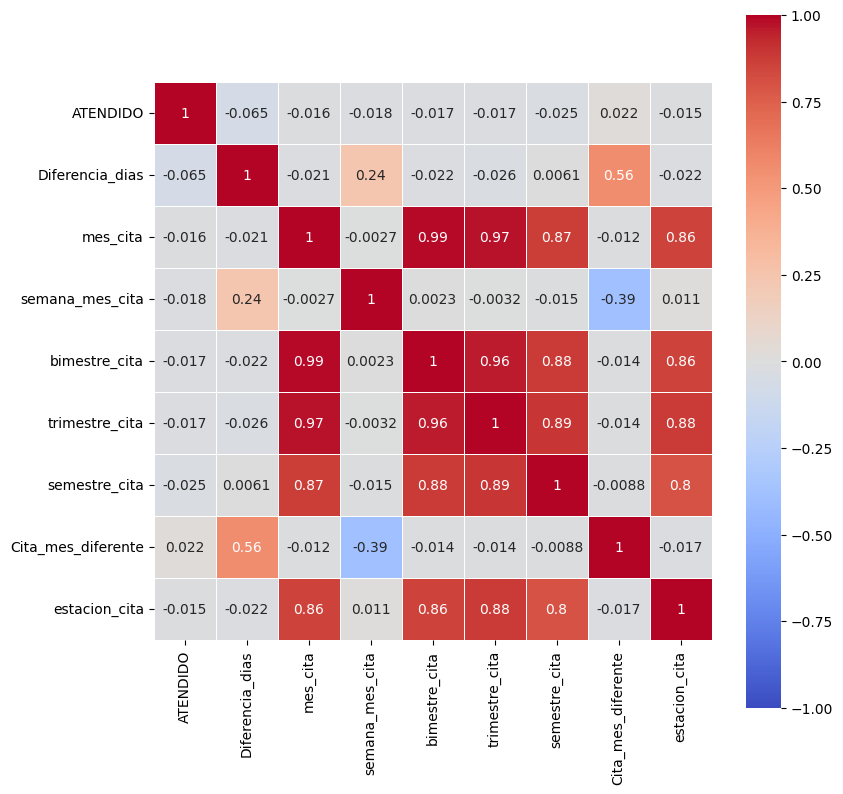

In [ ]:
# Seleccionar columnas numéricas del conjunto de datos nuevos
v_numericas5 = data1.iloc[:, [6] + list(range(8,16))]

correlaciones2 = v_numericas5.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(correlaciones2,cmap="coolwarm",vmin=-1,vmax=1,
            linewidths=.5,square=True,annot=True)

In [ ]:
# Select the columns and convert their type to 'category'
cols= data1.columns[[7] + list(range(9,16))]
data1[cols] = data1[cols].astype('category')

# Verificar los tipos de datos actualizados
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450136 entries, 0 to 450135
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DIA_SOLICITACITA    450136 non-null  datetime64[ns]
 1   DIA_CITA            450136 non-null  datetime64[ns]
 2   ESPECIALIDAD        450136 non-null  object        
 3   EDAD                450136 non-null  float64       
 4   SEGURO              450136 non-null  object        
 5   PRESENCIAL_REMOTO   450136 non-null  object        
 6   ATENDIDO            450136 non-null  int64         
 7   MONTO               450136 non-null  category      
 8   Diferencia_dias     450136 non-null  int64         
 9   mes_cita            450136 non-null  category      
 10  semana_mes_cita     450136 non-null  category      
 11  bimestre_cita       450136 non-null  category      
 12  trimestre_cita      450136 non-null  category      
 13  semestre_cita       450136 no

###  Descripcion de la nueva variable columnas

In [ ]:
data1['Diferencia_dias'].describe()

,Diferencia_dias
count,450136.000000
mean,19.814940
std,12.777777
min,-1.000000
25%,9.000000
50%,17.000000
75%,28.000000
max,89.000000


In [ ]:
df_diasn = data1[data1['Diferencia_dias'] < 0]
df_diasn

,DIA_SOLICITACITA,DIA_CITA,ESPECIALIDAD,EDAD,SEGURO,PRESENCIAL_REMOTO,ATENDIDO,MONTO,Diferencia_dias,mes_cita,semana_mes_cita,bimestre_cita,trimestre_cita,semestre_cita,Cita_mes_diferente,estacion_cita
107700,2023-03-31,2023-03-30,SALUD MENTAL,30.0,SI,REMOTO,0,33,-1,3,5,2,1,1,0,1
107750,2023-03-31,2023-03-30,SALUD MENTAL,23.0,SI,REMOTO,0,33,-1,3,5,2,1,1,0,1
132970,2023-04-21,2023-04-20,SALUD MENTAL,41.0,SI,REMOTO,0,33,-1,4,3,2,2,1,0,1
417362,2023-12-05,2023-12-04,OTORRINOLARINGOLOGIA,61.0,NO,PRESENCIAL,1,7,-1,12,1,6,4,2,0,3


### Limpieza de la nueva variable

In [ ]:
def limpiar_diferencia_dias(data):
    return data[data['Diferencia_dias'] >= 0].reset_index(drop=True)

data1 = limpiar_diferencia_dias(data1)


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450132 entries, 0 to 450131
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DIA_SOLICITACITA    450132 non-null  datetime64[ns]
 1   DIA_CITA            450132 non-null  datetime64[ns]
 2   ESPECIALIDAD        450132 non-null  object        
 3   EDAD                450132 non-null  float64       
 4   SEGURO              450132 non-null  object        
 5   PRESENCIAL_REMOTO   450132 non-null  object        
 6   ATENDIDO            450132 non-null  int64         
 7   MONTO               450132 non-null  category      
 8   Diferencia_dias     450132 non-null  int64         
 9   mes_cita            450132 non-null  category      
 10  semana_mes_cita     450132 non-null  category      
 11  bimestre_cita       450132 non-null  category      
 12  trimestre_cita      450132 non-null  category      
 13  semestre_cita       450132 no

In [ ]:
# Seleccionar columnas por posición
df_iloc = data1.iloc[:, 2:9]

# Seleccionar columnas por nombre
df_names = data1[['semestre_cita', 'Cita_mes_diferente','semana_mes_cita']]

# Concatenar ambas partes
data2 = pd.concat([df_iloc, df_names], axis=1)


## 4) Formateo de datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import cupy as cp

###  Escalamiento de variables numericos

In [ ]:
v_numericos = data2.select_dtypes([int,float]).drop(['ATENDIDO'],axis=1)
v_numericos.columns

Index(['EDAD', 'Diferencia_dias'], dtype='object')

In [ ]:
#v_numericos_minmax = pd.DataFrame(MinMaxScaler().fit_transform(v_numericos), columns=v_numericos.columns)
v_numericas_std = pd.DataFrame(StandardScaler().fit_transform(v_numericos), columns=v_numericos.columns)

###  Duminizacion de variables categoricas

In [ ]:
v_dum = data2.select_dtypes(["category","object"])
v_dum.columns


Index(['ESPECIALIDAD', 'SEGURO', 'PRESENCIAL_REMOTO', 'MONTO', 'semestre_cita',
       'Cita_mes_diferente', 'semana_mes_cita'],
      dtype='object')

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
v_dum_encoded = pd.DataFrame(encoder.fit_transform(v_dum),
                            columns=v_dum.columns,
                            index=v_dum.index)


In [ ]:
data3 = pd.concat([v_numericas_std,v_dum_encoded],axis=1)
data3.shape

(450132, 9)

In [ ]:
X = data3.values.astype('float32')
y = data2['ATENDIDO']
y.unique()

array([1, 0])

### Tratamiento de desbalance de clases

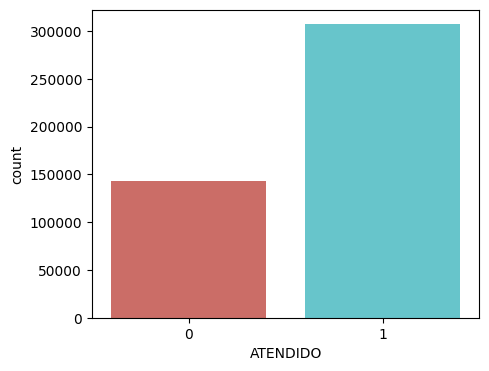

ATENDIDO
1    306883
0    143249
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='ATENDIDO',data= data2,palette='hls')
plt.show()
print(data2['ATENDIDO'].value_counts())

In [ ]:
X_bal, y_bal = SMOTETomek(sampling_strategy="minority", n_jobs=-1).fit_resample(X, y)

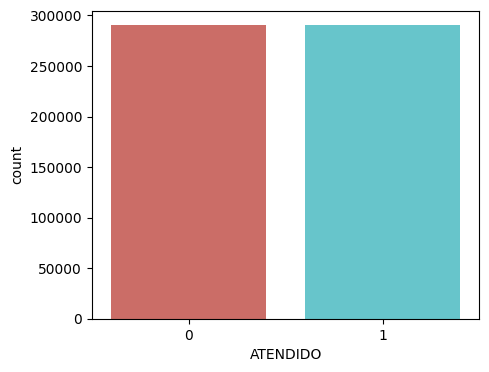

ATENDIDO
1    290147
0    290147
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x=y_bal, palette="hls")
plt.show()
print(y_bal.value_counts())

# **Modelos Boosting**

## 1) Selección de técnicas de modelado
Se seleccionaron algoritmos basados en árboles por su robustez, interpretabilidad y capacidad para manejar datos tabulares. Se utilizaron modelos de boosting y modelos de bagging:

- Modelos de Boosting por Gradiente: LightGBM, XGBoost
- Modelos de Bagging: Random Forest, Extra Trees

In [ ]:
# Librerías y configuración general
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import (
    classification_report, ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt

## 2) Configuración y entrenamiento de modelos

Se construyeron cuatro modelos de clasificación basados en árboles: LightGBM, XGBoost, Random Forest y Extra Trees.  
Para cada uno se configuraron manualmente los hiperparámetros más influyentes, considerando la naturaleza del dataset y evitando técnicas automáticas de búsqueda (por tiempo y recursos).

Entre los parámetros ajustados destacan:

- **n_estimators**: cantidad de árboles del modelo.
- **max_depth**: profundidad máxima de los árboles.
- **learning_rate** (solo en boosting): tasa de aprendizaje.
- **subsample** y **colsample_bytree**: proporciones de muestreo para regularización.
- **regularización**: `reg_alpha`, `reg_lambda` en modelos boosting.
- **bootstrap**, `max_features` en modelos bagging.



Una vez definidos, se entrenaron sobre los datos balanceados (X_train, y_train) y se evaluaron sobre datos no vistos (X_test, y_test) y evaluación de cada modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.15, random_state=123, stratify=y_bal)

print("Dimensiones de los conjuntos de entrenamiento y prueba:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Dimensiones de los conjuntos de entrenamiento y prueba:
X_train: (493249, 9)
X_test: (87045, 9)
y_train: (493249,)
y_test: (87045,)


In [ ]:
# Definir paramtros de modelos
lgbm_params = {
    "objective": "binary",
    "early_stopping_round": 100,
    "n_estimators": 3000,
    "max_depth": 10,
    "random_state": 42,
    "verbose": -1,
    "n_jobs": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.1,
    "subsample": 0.8,
}

xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "error",
    "early_stopping_rounds": 100,
    "use_label_encoder": False,
    "n_estimators": 3000,
    "max_depth": 13,
    "device": "cuda",
    "random_state": 42,
    "verbosity": 0,
    "subsample": 0.8,
    "n_jobs": -1
}

In [ ]:
lgbm_model = LGBMClassifier(**lgbm_params)

print("\nEntrenando modelo: LightGBM")
lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="binary_error",
)

# Obtener la mejor métrica y iteración
best_iteration = lgbm_model.best_iteration_
best_score = lgbm_model.best_score_

# Imprimir resultados
print(f"\nMejor iteración para LightGBM: {best_iteration}")
#print(f"Mejor métrica de validación: {best_score}")
print(f"Error binario en mejor iteración: {best_score['valid_0']['binary_error']}")


Entrenando modelo: LightGBM

Mejor iteración para LightGBM: 939
Error binario en mejor iteración: 0.1837670170601413


In [ ]:
X_train_cp = cp.array(X_train)
X_test_cp  = cp.array(X_test)

xgb_model = XGBClassifier(**xgb_params)

print("\nEntrenando modelo: XGB")
xgb_model.fit(
    X_train_cp, y_train,
    eval_set=[(X_test_cp, y_test)],
    verbose=False
)

# Obtener la mejor métrica y iteración
best_iteration = xgb_model.best_iteration
best_score = xgb_model.best_score

# Imprimir resultados
print(f"\nMejor iteración para LightGBM: {best_iteration}")
#print(f"Mejor métrica de validación: {best_score}")
print(f"Error binario en mejor iteración: {best_score}")


Entrenando modelo: XGB

Mejor iteración para LightGBM: 93
Error binario en mejor iteración: 0.18298581193635477


## 3) Validación del modelo
Se aplicó validación cruzada estratificada con 3 folds para estimar el rendimiento previo a probar en test.

In [ ]:
# Definir nuevos parametros de modelos
lgbm_params = {
    "objective": "binary",
    "eval_metric":"binary_error",
    "n_estimators": lgbm_model.best_iteration_,
    "max_depth": 13,
    "random_state": 42,
    "verbose": -1,
    "n_jobs": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.1,
}

xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "error",
    "use_label_encoder": False,
    "n_estimators": xgb_model.best_iteration,
    "max_depth": 13,
    "device": "cuda",
    "random_state": 42,
    "verbosity": 0,
    "n_jobs": -1
}

In [ ]:
lgbm_model = LGBMClassifier(**lgbm_params)
xgb_model = XGBClassifier(**xgb_params)

#model_list = [
#    ("LightGBM", lgbm_model),
#    ("XGBoost", xgb_model)
#]

In [ ]:
# Validación cruzada (accuracy como métrica)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"\nEvaluando modelo con validación cruzada:")
cv_results = cross_val_score(lgbm_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Accuracy por fold: {cv_results}")
print(f"Accuracy promedio: {cv_results.mean():.4f}")
print(f"Desviación estándar: {cv_results.std():.4f}")


Evaluando modelo con validación cruzada:
Accuracy por fold: [0.81547897 0.81636087 0.81609731 0.81347187 0.81396669]
Accuracy promedio: 0.8151
Desviación estándar: 0.0012


In [ ]:
# Validación cruzada (accuracy como métrica)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"\nEvaluando modelo con validación cruzada:")
cv_results = cross_val_score(xgb_model, X_train_cp, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Accuracy por fold: {cv_results}")
print(f"Accuracy promedio: {cv_results.mean():.4f}")
print(f"Desviación estándar: {cv_results.std():.4f}")


Evaluando modelo con validación cruzada:
Accuracy por fold: [0.81670552 0.81803345 0.81649265 0.81466802 0.81561901]
Accuracy promedio: 0.8163
Desviación estándar: 0.0011


## 4) Evaluación final en el conjunto de prueba
Se evaluó cada modelo en `X_test`, mostrando métricas clave y la matriz de confusión como gráfico.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix


--------------------------------------------------
Evaluando modelo LGBM en test:
--------------------------------------------------
Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9382    0.6762    0.7860     43523
           1     0.7469    0.9555    0.8384     43522

    accuracy                         0.8159     87045
   macro avg     0.8426    0.8159    0.8122     87045
weighted avg     0.8426    0.8159    0.8122     87045

Métricas Individuales:
Accuracy              : 0.8159
Precision (ponderado) : 0.8426
Recall (ponderado)    : 0.8159
F1 Score (ponderado)  : 0.8122
ROC AUC Score         : 0.8795


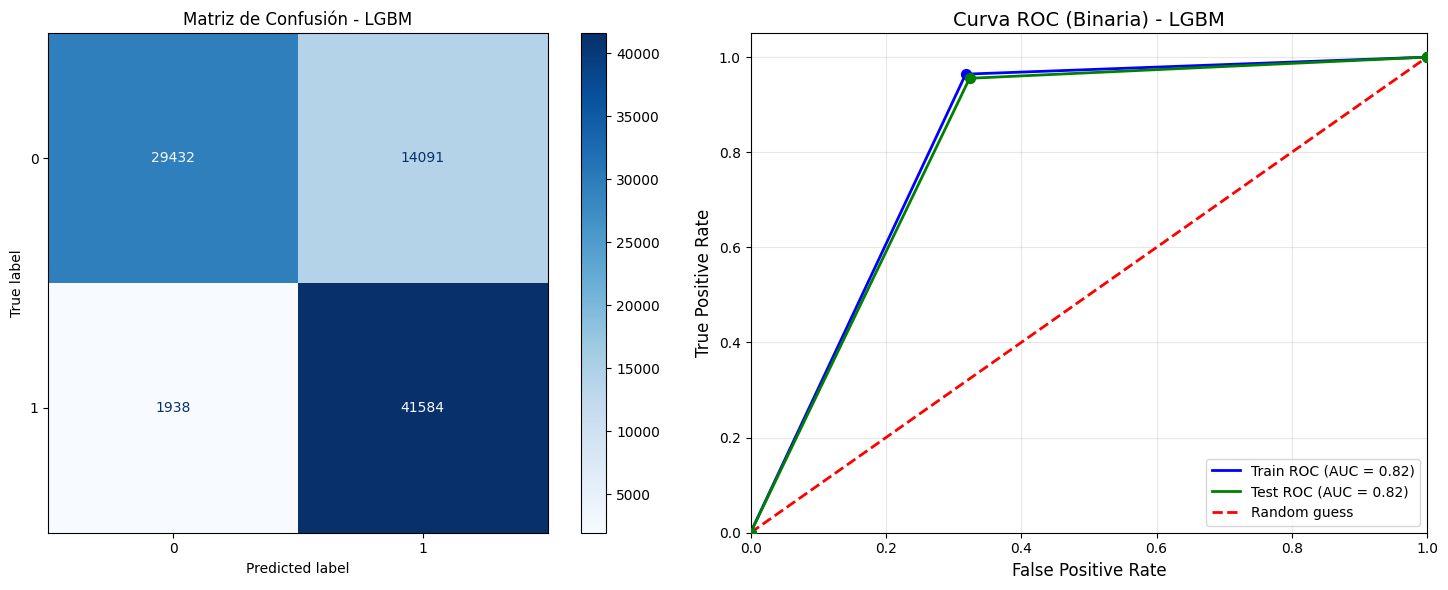


Curva ROC con predicciones binarias - LGBM:
AUC Train: 0.8231
AUC Test: 0.8159

Matriz de Confusión - LGBM:
TN: 29432, FP: 14091, FN: 1938, TP: 41584
FPR: 0.324, TPR: 0.955


In [ ]:
print(f"\n{'-'*50}")
print(f"Evaluando modelo LGBM en test:")
print(f"{'-'*50}")

# Entrenar y predecir
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
y_proba = lgbm_model.predict_proba(X_test)[:, 1]  # Para métricas que necesitan probabilidades

# Obtener predicciones binarias para train y test
y_pred_train_bin = (lgbm_model.predict(X_train) > 0.5).astype(int)
y_pred_test_bin = (lgbm_model.predict(X_test) > 0.5).astype(int)

# Calcular métricas de la curva ROC usando predicciones binarias
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_bin)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_bin)
roc_auc_test = auc(fpr_test, tpr_test)

# Métricas
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, digits=4))

print("Métricas Individuales:")
print(f"Accuracy              : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (ponderado) : {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall (ponderado)    : {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score (ponderado)  : {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"ROC AUC Score         : {roc_auc_score(y_test, y_proba):.4f}")

# Matriz de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de Confusión
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues', values_format='d', ax=ax1
)
ax1.set_title(f'Matriz de Confusión - LGBM')
ax1.grid(False)

# Graficar ambas curvas ROC (con predicciones binarias)
ax2.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC (AUC = {roc_auc_train:.2f})')
ax2.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC (AUC = {roc_auc_test:.2f})')
ax2.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random guess')

# Marcar los puntos en la curva
ax2.scatter(fpr_train, tpr_train, color='blue', s=50, zorder=5)
ax2.scatter(fpr_test, tpr_test, color='green', s=50, zorder=5)

ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title(f'Curva ROC (Binaria) - LGBM', fontsize=14)
ax2.legend(loc="lower right", fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar información adicional
print(f"\nCurva ROC con predicciones binarias - LGBM:")
print(f"AUC Train: {roc_auc_train:.4f}")
print(f"AUC Test: {roc_auc_test:.4f}")

# Matriz de confusión para entender los puntos en la curva ROC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"\nMatriz de Confusión - LGBM:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"FPR: {fp/(fp+tn):.3f}, TPR: {tp/(tp+fn):.3f}")


--------------------------------------------------
Evaluando modelo XGB en test:
--------------------------------------------------
Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9030    0.7110    0.7956     43523
           1     0.7617    0.9237    0.8349     43522

    accuracy                         0.8173     87045
   macro avg     0.8324    0.8173    0.8152     87045
weighted avg     0.8324    0.8173    0.8152     87045

Métricas Individuales:
Accuracy              : 0.8173
Precision (ponderado) : 0.8324
Recall (ponderado)    : 0.8173
F1 Score (ponderado)  : 0.8152
ROC AUC Score         : 0.8833


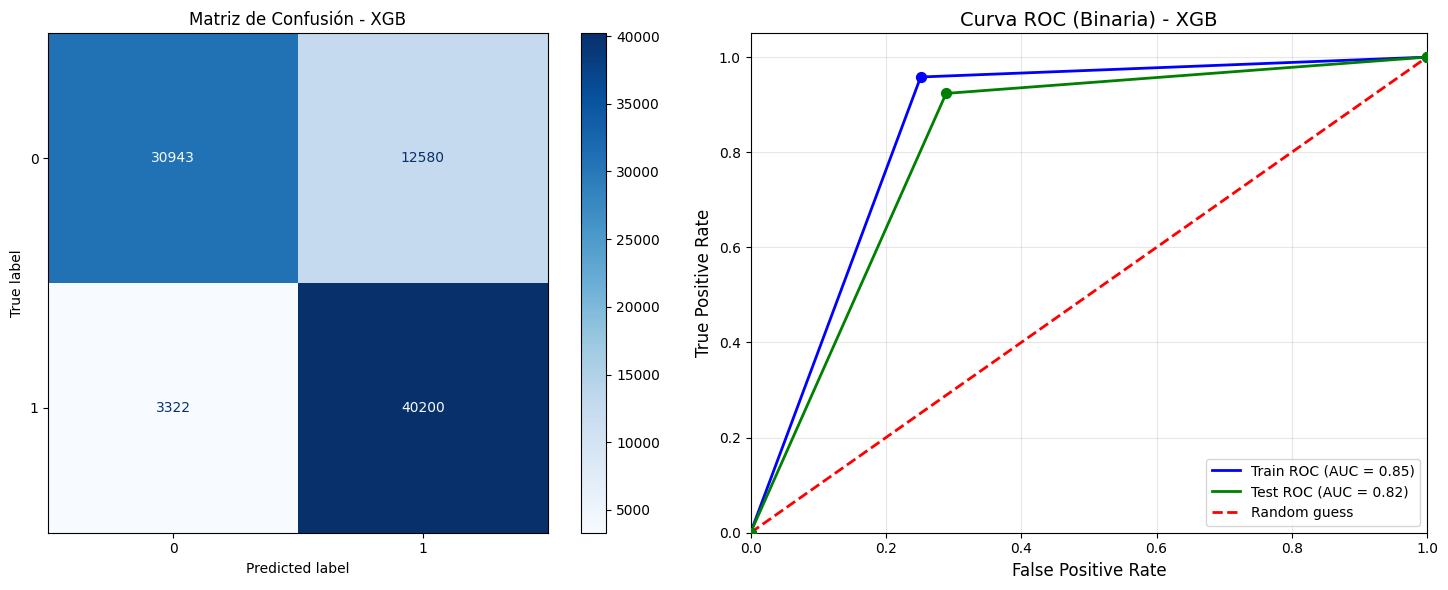


Curva ROC con predicciones binarias - XGB:
AUC Train: 0.8534
AUC Test: 0.8173

Matriz de Confusión - XGB:
TN: 30943, FP: 12580, FN: 3322, TP: 40200
FPR: 0.289, TPR: 0.924


In [ ]:
print(f"\n{'-'*50}")
print(f"Evaluando modelo XGB en test:")
print(f"{'-'*50}")

# Entrenar y predecir
xgb_model.fit(X_train_cp, y_train)
y_pred = xgb_model.predict(X_test_cp)
y_proba = xgb_model.predict_proba(X_test_cp)[:, 1]  # Para métricas que necesitan probabilidades

# Obtener predicciones binarias para train y test
y_pred_train_bin = (xgb_model.predict(X_train_cp) > 0.5).astype(int)
y_pred_test_bin = (xgb_model.predict(X_test_cp) > 0.5).astype(int)

# Calcular métricas de la curva ROC usando predicciones binarias
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_bin)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_bin)
roc_auc_test = auc(fpr_test, tpr_test)

# Métricas
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, digits=4))

print("Métricas Individuales:")
print(f"Accuracy              : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (ponderado) : {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall (ponderado)    : {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score (ponderado)  : {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"ROC AUC Score         : {roc_auc_score(y_test, y_proba):.4f}")

# Matriz de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de Confusión
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues', values_format='d', ax=ax1
)
ax1.set_title(f'Matriz de Confusión - XGB')
ax1.grid(False)

# Graficar ambas curvas ROC (con predicciones binarias)
ax2.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC (AUC = {roc_auc_train:.2f})')
ax2.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC (AUC = {roc_auc_test:.2f})')
ax2.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random guess')

# Marcar los puntos en la curva
ax2.scatter(fpr_train, tpr_train, color='blue', s=50, zorder=5)
ax2.scatter(fpr_test, tpr_test, color='green', s=50, zorder=5)

ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title(f'Curva ROC (Binaria) - XGB', fontsize=14)
ax2.legend(loc="lower right", fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar información adicional
print(f"\nCurva ROC con predicciones binarias - XGB:")
print(f"AUC Train: {roc_auc_train:.4f}")
print(f"AUC Test: {roc_auc_test:.4f}")

# Matriz de confusión para entender los puntos en la curva ROC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"\nMatriz de Confusión - XGB:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"FPR: {fp/(fp+tn):.3f}, TPR: {tp/(tp+fn):.3f}")

# **Modelos Redes Nuronales**

In [ ]:
import torch
# Selecciona GPU si está disponible, si no usa CPU
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow import keras
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Define la cantidad de pasos de tiempo y características
#n_pasos_tiempo = 1
n_caracteristicas = X_train.shape[1]

In [ ]:
# Reformatear los datos para la entrada LSTM: (muestras, pasos_de_tiempo, características)
#X_train_reshaped = X_train.reshape((X_train.shape[0], n_pasos_tiempo, n_caracteristicas))
#X_test_reshaped = X_test.reshape((X_test.shape[0], n_pasos_tiempo, n_caracteristicas))

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(n_caracteristicas,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer = AdamW(learning_rate=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
# Define el callback EarlyStopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', # Monitorea la pérdida en el conjunto de validación
    patience=3,         # Espera 3 épocas sin mejora antes de detenerse
    restore_best_weights=True  # Restaura los pesos del modelo a la mejor época
)

In [ ]:
# Convierte tus etiquetas a tipo float32
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
# Ahora, puedes usar este callback en tu línea de entrenamiento
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    validation_data=(X_test, y_test),
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
7708/7708 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.5860 - loss: 0.6660 - val_accuracy: 0.6178 - val_loss: 0.6285
Epoch 2/20
7708/7708 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.6207 - loss: 0.6292 - val_accuracy: 0.6233 - val_loss: 0.6263
Epoch 3/20
7708/7708 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.6243 - loss: 0.6248 - val_accuracy: 0.6257 - val_loss: 0.6210
Epoch 4/20
7708/7708 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.6266 - loss: 0.6220 - val_accuracy: 0.6272 - val_loss: 0.6169
Epoch 5/20
7708/7708 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.6280 - loss: 0.6194 - val_accuracy: 0.6360 - val_loss: 0.6131
Epoch 6/20
7708/7708 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.6291 - loss: 0.6175 - val_accuracy: 0.6360 - val_loss: 0.6122
Epoch 7/20
7708/7708 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.6318 - loss: 0.6164 - val_accuracy: 0.6356 - val_loss: 0.6082
Epoch 8/20
7708/7708 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.6346 - loss: 0

2721/2721 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


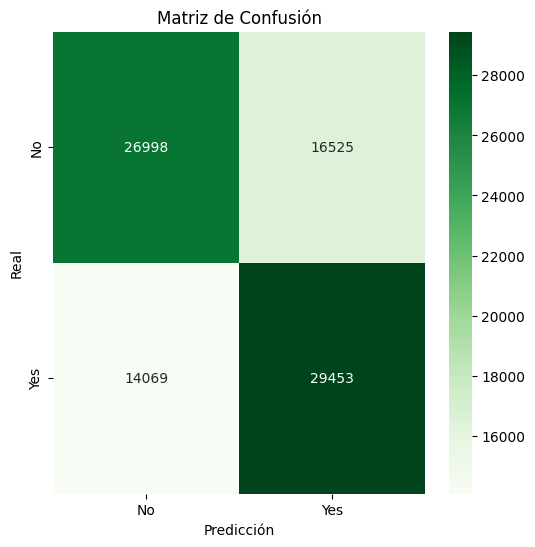

In [ ]:
y_pred = (model.predict(X_test) > 0.5)  # Convertir las probabilidades a 0 o 1
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print(report)

              precision    recall  f1-score   support

          No       0.66      0.62      0.64     43523
         Yes       0.64      0.68      0.66     43522

    accuracy                           0.65     87045
   macro avg       0.65      0.65      0.65     87045
weighted avg       0.65      0.65      0.65     87045



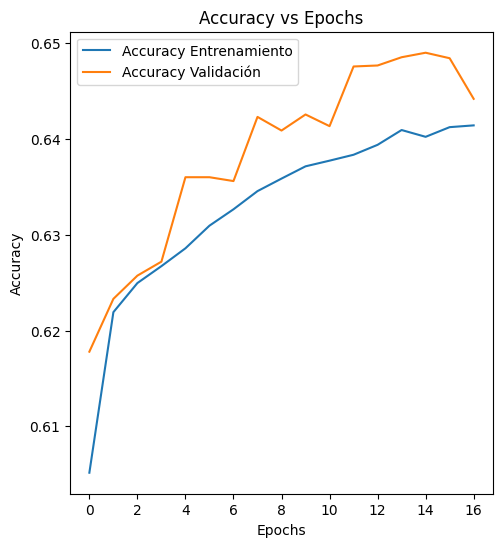

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

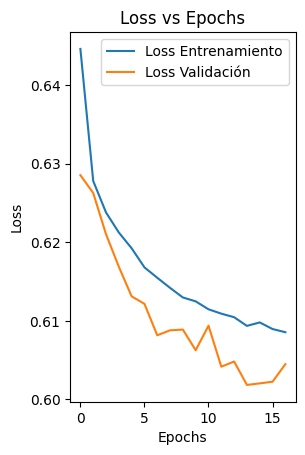

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validación')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15415/15415 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step


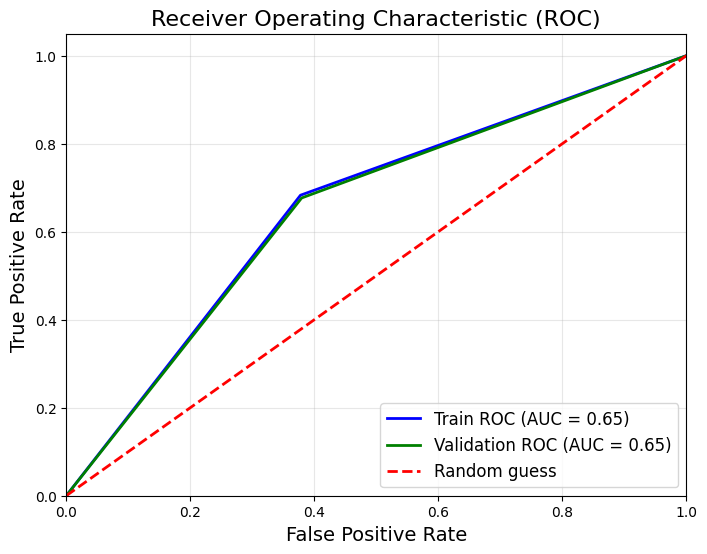

In [ ]:
# Obtener las predicciones de probabilidades
y_pred_train = (model.predict(X_train) > 0.5)  # Convertir las probabilidades a 0 o 1

# Calcular las métricas de la curva ROC para entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Calcular las métricas de la curva ROC para validación
fpr_val, tpr_val, _ = roc_curve(y_test, y_pred)
roc_auc_val = auc(fpr_val, tpr_val)

# Graficar ambas curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# **Evaluación**

En esta etapa se analizó el rendimiento de los modelos entrenados con el conjunto de prueba (`X_test`, `y_test`) con el objetivo de seleccionar el modelo más adecuado para la predicción de asistencia a citas médicas en el Hospital de Apoyo María Auxiliadora.

## Comparación de métricas principales

| Modelo         | Accuracy | F1 ponderado | ROC AUC |
|----------------|----------|--------------|---------|
| **LightGBM**   | **0.8129** | **0.8091**   | **0.8794** |
| XGBoost        | 0.7631   | 0.7598       | 0.8429  |
| Random Forest  | 0.7780   | 0.7779       | 0.8562  |
| Extra Trees    | 0.7769   | 0.7769       | 0.8324  |

## Conclusión

El modelo **LightGBM** presentó el mejor desempeño general en términos de:

- Precisión global (accuracy),
- Balance entre precisión y recall (F1-score ponderado),
- Capacidad discriminativa entre clases (ROC AUC).

Además, logró un **recall alto para la clase positiva**, lo cual es clave para anticipar con precisión los pacientes que sí asistirán a su cita médica, optimizando así la planificación de recursos hospitalarios.

En base a estos resultados, **LightGBM** fue seleccionado como el modelo final para la fase de implementación.


# **Implementación**

Como resultado del análisis y evaluación de los modelos predictivos, se propone implementar el modelo **LightGBM** en el sistema de gestión del Hospital de Apoyo María Auxiliadora.

## Objetivo de la implementación

El modelo tiene como finalidad anticipar la probabilidad de asistencia de los pacientes a sus citas médicas programadas. Esto permitirá:

- Optimizar la asignación de médicos y recursos hospitalarios.
- Reducir la congestión por inasistencias.
- Mejorar la programación de citas y la eficiencia operativa.

## Propuesta de integración

1. **Despliegue del modelo**: El modelo entrenado será exportado y alojado en un entorno productivo (servidor local o nube), listo para recibir nuevos datos de pacientes y devolver predicciones en tiempo real o por lotes.

2. **Interfaz de uso**: Se puede desarrollar una interfaz web sencilla donde el personal administrativo ingrese los datos de la cita y el sistema devuelva la probabilidad de asistencia.

3. **Automatización**: Integrar el modelo con el sistema de citas del hospital para procesar las solicitudes de manera automatizada y generar alertas sobre posibles inasistencias.

4. **Monitoreo continuo**: Establecer un plan de monitoreo del rendimiento del modelo con métricas clave como accuracy y recall. Además, implementar rutinas periódicas de reentrenamiento con datos actualizados.

5. **Capacitación**: Brindar capacitación básica al personal del hospital para interpretar las predicciones y actuar en consecuencia, como confirmar citas de alto riesgo de inasistencia.

## Consideraciones finales

La implementación del modelo debe ir acompañada de políticas internas de uso ético y responsable de los datos, garantizando la confidencialidad del paciente. Con esta propuesta, el hospital podrá avanzar hacia una atención médica más predictiva, eficiente y centrada en el paciente.
